In [6]:
import pylab
import pymoc
import xidplus
import numpy as np
%matplotlib inline
from astropy.io import fits
from astropy import wcs
from astropy.table import Table
import pandas as pd

## Read tables

In [7]:
cat=Table.read('data/changed_psf/dmu26_XID+MIPS_HDF-N_changedpsf_cat.fits')

## Look at Symmetry of PDFs to determine depth level of catalogue

4.9851093


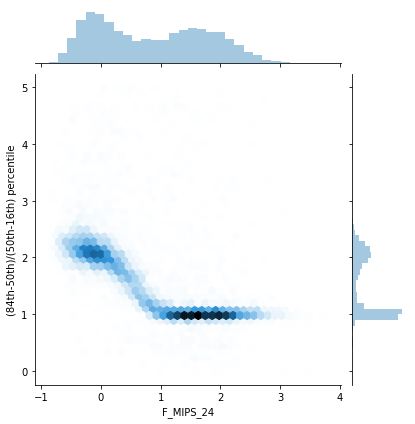

In [8]:
import seaborn as sns
skew=(cat['FErr_MIPS_24_u']-cat['F_MIPS_24'])/(cat['F_MIPS_24']-cat['FErr_MIPS_24_l'])
skew.name='(84th-50th)/(50th-16th) percentile'
use = skew < 5
g=sns.jointplot(x=np.log10(cat['F_MIPS_24'][use]),y=skew[use], kind='hex')
print(np.max(skew[use]))


Both seem to have flux pdfs that become Gaussian at ~8$\mathrm{\mu Jy}$ 

## Add flag to catalogue

In [9]:
from astropy.table import Column
cat.add_column(Column(np.zeros(len(cat), dtype=bool),name='flag_mips_24'))


In [10]:
ind=(cat['Pval_res_24']>0.5) | (cat['F_MIPS_24'] < 8.0)

In [11]:
cat['flag_mips_24'][ind]=True


In [12]:
cat.write('./data/changed_psf/dmu26_XID+MIPS_HDF-N_cat_20190504.fits', format='fits',overwrite=True)

### Check Map


In [13]:
from astropy.io import fits
import pylab as plt

In [19]:
MIPS_pval1=fits.open('./data/dmu26_XID+MIPS_HDF-N_Bayes_Pval.fits')
MIPS_pval2=fits.open('./data/changed_psf/dmu26_XID+MIPS_HDF-N_Bayes_Pval.fits')


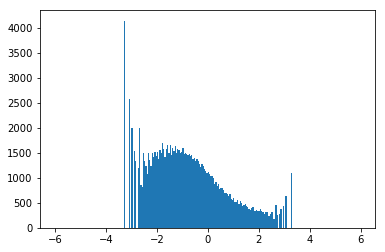

In [20]:
plt.hist(MIPS_pval1[1].data[np.isfinite(MIPS_pval1[1].data)],bins=np.arange(-6,6,0.05));

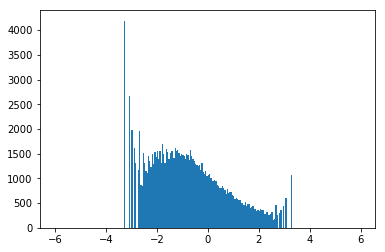

In [21]:
plt.hist(MIPS_pval2[1].data[np.isfinite(MIPS_pval2[1].data)],bins=np.arange(-6,6,0.05));

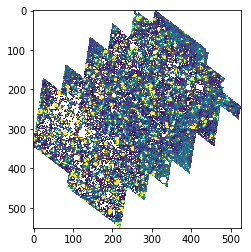

In [22]:
plt.imshow(MIPS_pval1[1].data)

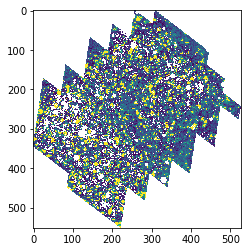

In [23]:
plt.imshow(MIPS_pval2[1].data)

In [16]:
priors,posterior=xidplus.load('./data/.pkl')

FileNotFoundError: [Errno 2] No such file or directory: './data/.pkl'